# Datenauswertung Kompotoi Team A

### Last modified: Pascal Berger, 17.04.2021

## Read data from sigfox api


Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [161]:
# packages import
import requests
import json
import pandas as pd
import numpy as np

from matplotlib import *


Login to api

In [162]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [163]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,607b0bf71ef743213db9c90f.894dfb9fa7248b5efabc9...


get devices data

In [164]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

# payload = json.dumps([
#   {
#     "data": [],
#     "count": 2,
#     "meta": {}
#   }
# ])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers)
#print(devices_response.text)


In [165]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607acb301ef743213db0ffed', 'keys': [...",[],[],"{'_id': '607acb301ef743213db0ffed', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '607ae9bcd131ef4664579706', 'keys': [...",[],[],"{'_id': '607ae9bcd131ef4664579706', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '607b04e6d131ef46645ac220', 'keys': [...",[],[],"{'_id': '607b04e6d131ef46645ac220', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '607b0a2bd131ef46645b3cbb', 'keys': [...",[],[],"{'_id': '607b0a2bd131ef46645b3cbb', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '607b0a3dd131ef46645b3e00', 'keys': [...",[],[],"{'_id': '607b0a3dd131ef46645b3e00', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '607b08901ef743213db98582', 'keys': [...",[],[],"{'_id': '607b08901ef743213db98582', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


---
## Read sensor data to dataframe

In [166]:
%%time
message_data_combined = pd.DataFrame()

for deviceid in device_data['id'].items():
  deviceid = deviceid[1]
  url = "https://www.iofrog.com/api/v2/devices/" + deviceid + "/messages?timestampFrom=1616601600&limit=5000"

  # payload = json.dumps({
  #   "data": [
  #     {
  #       "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
  #       "isAlarm": False,
  #       "isDismissed": False,
  #       "timestamp": 1584093653,
  #       "type": "data_uplink",
  #       "seqNumber": 1,
  #       "keys": [
  #         {
  #           "isCode": False,
  #           "_id": "1111111111111111111111",
  #           "key": "key",
  #           "value": "value",
  #           "keyLocale": "Klíč",
  #           "valueLocale": "Hodnota",
  #           "color": "alarm",
  #           "icon": "icon name (from fontAwesome)"
  #         }
  #       ]
  #     }
  #   ],
  #   "count": 1
  # })
  headers = {
    'Authorization': 'Bearer ' + access_token,
    'Content-Type': 'application/json',
    'Cookie': ''
  }
  message_response = requests.request("GET", url, headers=headers)
  # print(response.text)
  message_dict = json.loads(message_response.text)
  # json response to dataframe
  if 'code' in message_dict:
    print("Error reading sensor messages from device: " + deviceid)
    print(message_dict)
  else:
    message_data = pd.DataFrame.from_dict(message_dict['data'])
    message_data = message_data.drop(columns=['keys'])
    message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
    message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
    message_data_keys.reset_index(inplace=True)
    message_data_keys = message_data_keys.groupby('_id').sum()
    #print(message_data_keys)
    # join df's
    message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)
    message_data_combined = pd.concat([message_data_combined, message_data])

message_data_combined

Wall time: 7.1 s


,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607acb301ef743213db0ffed,1618660143,data_bidir,148.0,2203AF9,2021-04-17T11:49:04.912Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,607a5a0ed131ef4664489f25,1618631181,data_bidir,147.0,2203AF9,2021-04-17T03:46:22.619Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6079e8ea1ef743213da10905,1618602217,data_bidir,146.0,2203AF9,2021-04-16T19:43:38.346Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,607906bc4568aa5ea543c9e0,1618544314,data_bidir,143.0,2203AF9,2021-04-16T03:38:36.137Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,607895968227aa5e8573d5e6,1618515349,data_bidir,142.0,2203AF9,2021-04-15T19:35:50.070Z,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,605b7844f4e46133dc9f0885,1616607298,data_bidir,153.0,2203ACB,2021-03-24T17:35:00.665Z,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,605b7262f4e46133dc9eae68,1616605778,data_bidir,152.0,2203ACB,2021-03-24T17:09:54.843Z,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,605b6b38f4e46133dc9e40bf,1616603959,data_bidir,151.0,2203ACB,2021-03-24T16:39:20.359Z,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,605b67ab7746444305bd79a8,1616603049,data_bidir,150.0,2203ACB,2021-03-24T16:24:11.052Z,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datatype conversions, remove of unused columns

In [167]:
message_data_combined['created'] = pd.to_datetime(message_data_combined['created'])
# not needed later
message_data_combined['timestamp'] = pd.to_datetime(message_data_combined['timestamp'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607acb301ef743213db0ffed,1970-01-01 00:00:01.618660143,data_bidir,148.0,2203AF9,2021-04-17 11:49:04.912000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,607a5a0ed131ef4664489f25,1970-01-01 00:00:01.618631181,data_bidir,147.0,2203AF9,2021-04-17 03:46:22.619000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6079e8ea1ef743213da10905,1970-01-01 00:00:01.618602217,data_bidir,146.0,2203AF9,2021-04-16 19:43:38.346000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,607906bc4568aa5ea543c9e0,1970-01-01 00:00:01.618544314,data_bidir,143.0,2203AF9,2021-04-16 03:38:36.137000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,607895968227aa5e8573d5e6,1970-01-01 00:00:01.618515349,data_bidir,142.0,2203AF9,2021-04-15 19:35:50.070000+00:00,0,heartbeat_1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,605b7844f4e46133dc9f0885,1970-01-01 00:00:01.616607298,data_bidir,153.0,2203ACB,2021-03-24 17:35:00.665000+00:00,0,reed_counter,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,605b7262f4e46133dc9eae68,1970-01-01 00:00:01.616605778,data_bidir,152.0,2203ACB,2021-03-24 17:09:54.843000+00:00,0,reed_counter,0,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,605b6b38f4e46133dc9e40bf,1970-01-01 00:00:01.616603959,data_bidir,151.0,2203ACB,2021-03-24 16:39:20.359000+00:00,0,reed_counter,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,605b67ab7746444305bd79a8,1970-01-01 00:00:01.616603049,data_bidir,150.0,2203ACB,2021-03-24 16:24:11.052000+00:00,0,reed_counter,0,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert int to float values

In [168]:
message_data_combined['counter'] = pd.to_numeric(message_data_combined['counter'])
message_data_combined

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,...,reed_on,x_fin,x_max,x_min,y_fin,y_max,y_min,z_fin,z_max,z_min
0,607acb301ef743213db0ffed,1970-01-01 00:00:01.618660143,data_bidir,148.0,2203AF9,2021-04-17 11:49:04.912000+00:00,0,heartbeat_1,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,607a5a0ed131ef4664489f25,1970-01-01 00:00:01.618631181,data_bidir,147.0,2203AF9,2021-04-17 03:46:22.619000+00:00,0,heartbeat_1,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6079e8ea1ef743213da10905,1970-01-01 00:00:01.618602217,data_bidir,146.0,2203AF9,2021-04-16 19:43:38.346000+00:00,0,heartbeat_1,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,607906bc4568aa5ea543c9e0,1970-01-01 00:00:01.618544314,data_bidir,143.0,2203AF9,2021-04-16 03:38:36.137000+00:00,0,heartbeat_1,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,607895968227aa5e8573d5e6,1970-01-01 00:00:01.618515349,data_bidir,142.0,2203AF9,2021-04-15 19:35:50.070000+00:00,0,heartbeat_1,3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,605b7844f4e46133dc9f0885,1970-01-01 00:00:01.616607298,data_bidir,153.0,2203ACB,2021-03-24 17:35:00.665000+00:00,0,reed_counter,0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
376,605b7262f4e46133dc9eae68,1970-01-01 00:00:01.616605778,data_bidir,152.0,2203ACB,2021-03-24 17:09:54.843000+00:00,0,reed_counter,0,63.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,605b6b38f4e46133dc9e40bf,1970-01-01 00:00:01.616603959,data_bidir,151.0,2203ACB,2021-03-24 16:39:20.359000+00:00,0,reed_counter,0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,605b67ab7746444305bd79a8,1970-01-01 00:00:01.616603049,data_bidir,150.0,2203ACB,2021-03-24 16:24:11.052000+00:00,0,reed_counter,0,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check and remove unused columns

In [169]:
print(message_data_combined.columns)

Index(['_id', 'timestamp', 'type', 'seqNumber', 'deviceId', 'created', '__v',
       'action', 'battery', 'counter', 'firmware',
       'hw_config_accelerometer_type', 'hw_config_has_beeper',
       'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led',
       'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi',
       'hw_config_temp_type', 'mode', 'temperature', 'version', '_merge',
       'dl_with_timestamp', 'humidity', 'light_on', 'reed_on', 'x_fin',
       'x_max', 'x_min', 'y_fin', 'y_max', 'y_min', 'z_fin', 'z_max', 'z_min'],
      dtype='object')


In [170]:
print(message_data_combined['__v'].value_counts())
print(message_data_combined['hw_config_accelerometer_type'].value_counts())
print(message_data_combined['hw_config_has_beeper'].value_counts())
print(message_data_combined['hw_config_has_leakage'].value_counts())
print(message_data_combined['type'].value_counts())
print(message_data_combined['version'].value_counts())
print(message_data_combined['_merge'].value_counts())
print(message_data_combined['dl_with_timestamp'].value_counts())
# humidity is not working, always 0 or false
print(message_data_combined['humidity'].value_counts())
print(message_data_combined['light_on'].value_counts())
print(message_data_combined['reed_on'].value_counts())

print(message_data_combined['firmware'].value_counts())
# check if we need service informations -> not really, drop
message_data_combined.loc[message_data_combined['firmware'] == '1.0', 'firmware':'dl_with_timestamp'].head(1)


0    2990
Name: __v, dtype: int64
0           2983
LIS2DH12       7
Name: hw_config_accelerometer_type, dtype: int64
0        2983
false       7
Name: hw_config_has_beeper, dtype: int64
0        2983
false       7
Name: hw_config_has_leakage, dtype: int64
data_bidir     2973
service_ack      17
Name: type, dtype: int64
0    2983
6       7
Name: version, dtype: int64
both          2990
left_only        0
right_only       0
Name: _merge, dtype: int64
0        181
false      2
Name: dl_with_timestamp, dtype: int64
0     181
56      2
Name: humidity, dtype: int64
0        181
false      2
Name: light_on, dtype: int64
0        181
false      2
Name: reed_on, dtype: int64
0      2983
1.0       7
Name: firmware, dtype: int64


,firmware,hw_config_accelerometer_type,hw_config_has_beeper,hw_config_has_button,hw_config_has_leakage,hw_config_has_led,hw_config_has_light,hw_config_has_reed,hw_config_has_wifi,hw_config_temp_type,mode,temperature,version,_merge,dl_with_timestamp
37,1.0,LIS2DH12,false,true,false,true,true,true,true,temp_and_humidity,reed_counter,0,6,both,NaN


### 

In [171]:
# test, if we can gather informations from xyz values -> not really
print(message_data_combined['x_min'].value_counts().head())
print(message_data_combined['x_fin'].value_counts().head())
print(message_data_combined['x_max'].value_counts().head())
print(message_data_combined['y_min'].value_counts().head())
print(message_data_combined['y_max'].value_counts().head())
print(message_data_combined['z_min'].value_counts().head())
print(message_data_combined['z_max'].value_counts().head())

0      882
896    130
-32     75
912     62
-16     34
Name: x_min, dtype: int64
0      882
912    329
896     66
16      55
928     44
Name: x_fin, dtype: int64
0      882
928    157
912    138
0       61
944     43
Name: x_max, dtype: int64
0      882
432    237
416     92
960     63
992     54
Name: y_min, dtype: int64
0       882
448     174
976     108
1008     69
992      60
Name: y_max, dtype: int64
0      882
16     157
0      105
-16     60
-32     33
Name: z_min, dtype: int64
0     882
32    138
48    122
0      56
16     35
Name: z_max, dtype: int64


### drop columns

In [172]:
# to check for problems set: errors='raise', otherwise errors='ignore'
message_data_combined.drop(columns=['_id', 'timestamp', 'type', 'seqNumber', '__v', 'firmware', 'hw_config_accelerometer_type', 'hw_config_has_beeper', 'hw_config_has_button', 'hw_config_has_leakage', 'hw_config_has_led', 'hw_config_has_light', 'hw_config_has_reed', 'hw_config_has_wifi', 'hw_config_temp_type', 'version', '_merge', 'dl_with_timestamp', 'humidity', 'light_on', 'reed_on'], inplace=True, errors='ignore') 

message_data_combined.drop(columns=['x_min', 'x_fin', 'x_max', 'y_min', 'y_fin', 'y_max', 'z_min', 'z_fin', 'z_max'], inplace=True, errors='ignore')


message_data_combined

,deviceId,created,action,battery,counter,mode,temperature
0,2203AF9,2021-04-17 11:49:04.912000+00:00,heartbeat_1,3,0.0,reed_counter,27
1,2203AF9,2021-04-17 03:46:22.619000+00:00,heartbeat_1,3,0.0,reed_counter,24.5
2,2203AF9,2021-04-16 19:43:38.346000+00:00,heartbeat_1,3,0.0,reed_counter,25
3,2203AF9,2021-04-16 03:38:36.137000+00:00,heartbeat_1,3,0.0,reed_counter,24.5
4,2203AF9,2021-04-15 19:35:50.070000+00:00,heartbeat_1,3,0.0,reed_counter,25.5
...,...,...,...,...,...,...,...
375,2203ACB,2021-03-24 17:35:00.665000+00:00,reed_counter,0,64.0,reed_counter,0
376,2203ACB,2021-03-24 17:09:54.843000+00:00,reed_counter,0,63.0,reed_counter,0
377,2203ACB,2021-03-24 16:39:20.359000+00:00,reed_counter,0,60.0,reed_counter,0
378,2203ACB,2021-03-24 16:24:11.052000+00:00,reed_counter,0,59.0,reed_counter,0


### Sort datframe by sensorId and then by ascending creation timestamp

In [173]:
message_data_combined.sort_values(by=['deviceId', 'created'], inplace = True)
message_data_combined.reset_index(drop=True, inplace=True)
message_data_combined

,deviceId,created,action,battery,counter,mode,temperature
0,1F25047,2021-03-24 16:09:10.882000+00:00,first_move,0,NaN,put_me_back,0
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,NaN,put_me_back,0
2,1F25047,2021-03-24 16:10:19.624000+00:00,first_move,0,NaN,put_me_back,0
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,NaN,put_me_back,0
4,1F25047,2021-03-24 16:21:12.376000+00:00,end_of_orientation_alarm,0,NaN,put_me_back,0
...,...,...,...,...,...,...,...
2985,2203AFA,2021-04-16 15:40:16.414000+00:00,heartbeat_1,3,NaN,reed_counter,16
2986,2203AFA,2021-04-16 23:44:00.995000+00:00,heartbeat_2,2.9,NaN,reed_counter,3
2987,2203AFA,2021-04-17 07:50:47.981000+00:00,heartbeat_2,3,NaN,reed_counter,4.5
2988,2203AFA,2021-04-17 15:54:25.122000+00:00,heartbeat_2,2.9,NaN,reed_counter,15


### Fill counter values for non tilt sensors

In [174]:
print(message_data_combined['mode'].value_counts())
print(message_data_combined['action'].value_counts().head(7))
# use action = 'orientation_changed' as counter index as it has the most values
for deviceId in message_data_combined['deviceId'].unique():
    message_data_combined.loc[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId), 'counter'] = (list(message_data_combined[(message_data_combined['action'] == 'orientation_changed') & (message_data_combined['deviceId'] == deviceId)].reset_index().index))

# message_data_combined['counter'] = np.cumsum(message_data_combined['counter'])
message_data_combined[message_data_combined['action'] == 'orientation_changed']

put_me_back     1478
reed_counter    1299
press_me         196
0                 17
Name: mode, dtype: int64
reed_counter                1007
orientation_changed          618
first_move                   592
heartbeat_1                  448
heartbeat_2                  132
end_of_orientation_alarm      75
orientation_alarm             75
Name: action, dtype: int64


,deviceId,created,action,battery,counter,mode,temperature
1,1F25047,2021-03-24 16:10:03.512000+00:00,orientation_changed,0,0.0,put_me_back,0
3,1F25047,2021-03-24 16:11:24.607000+00:00,orientation_changed,0,1.0,put_me_back,0
7,1F25047,2021-03-24 16:24:28.338000+00:00,orientation_changed,0,2.0,put_me_back,0
9,1F25047,2021-03-24 16:41:07.753000+00:00,orientation_changed,0,3.0,put_me_back,0
11,1F25047,2021-03-24 17:06:50.172000+00:00,orientation_changed,0,4.0,put_me_back,0
...,...,...,...,...,...,...,...
1486,1F2504E,2021-04-16 09:55:37.896000+00:00,orientation_changed,0,60.0,put_me_back,0
1489,1F2504E,2021-04-16 12:47:43.165000+00:00,orientation_changed,0,61.0,put_me_back,0
1491,1F2504E,2021-04-16 14:35:37.944000+00:00,orientation_changed,0,62.0,put_me_back,0
1496,1F2504E,2021-04-17 08:07:57.461000+00:00,orientation_changed,0,63.0,put_me_back,0


In [175]:
# check if the strucure look ok
for deviceId in message_data_combined['deviceId'].unique():
    print(message_data_combined.loc[message_data_combined['deviceId'] == deviceId, ['deviceId', 'mode', 'created', 'counter']].head())

  deviceId         mode                          created  counter
0  1F25047  put_me_back 2021-03-24 16:09:10.882000+00:00      NaN
1  1F25047  put_me_back 2021-03-24 16:10:03.512000+00:00      0.0
2  1F25047  put_me_back 2021-03-24 16:10:19.624000+00:00      NaN
3  1F25047  put_me_back 2021-03-24 16:11:24.607000+00:00      1.0
4  1F25047  put_me_back 2021-03-24 16:21:12.376000+00:00      NaN
     deviceId      mode                          created  counter
1317  1F2504E  press_me 2021-03-25 08:45:25.628000+00:00      NaN
1318  1F2504E  press_me 2021-03-26 09:18:57.557000+00:00      NaN
1319  1F2504E  press_me 2021-03-27 09:50:29.340000+00:00      NaN
1320  1F2504E  press_me 2021-03-28 10:27:56.461000+00:00      NaN
1321  1F2504E  press_me 2021-03-29 11:02:14.920000+00:00      NaN
     deviceId          mode                          created  counter
1500  2203AAB  reed_counter 2021-03-25 13:14:43.865000+00:00      0.0
1501  2203AAB  reed_counter 2021-03-25 15:46:27.249000+00:00     88.

### Pivot data for each sensor

In [197]:
message_data_wide = message_data_combined.pivot(index=['created'], columns='deviceId', values='counter').reset_index().add_prefix('counter_')
message_data_wide.rename(columns={'counter_created':'created', 'counter_deviceId':'deviceId'}, inplace = True)
# divide AAB / 2 because door is opened twice per usage
message_data_wide['counter_2203AAB'] = message_data_wide['counter_2203AAB'] / 2

message_data_wide.columns.name = None

message_data_wide

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA
0,2021-03-24 16:09:10.882000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-24 16:09:49.988000+00:00,NaN,NaN,NaN,57.0,NaN,NaN
2,2021-03-24 16:10:03.512000+00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,2021-03-24 16:10:19.624000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24 16:11:24.607000+00:00,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2985,2021-04-17 16:10:56.096000+00:00,NaN,NaN,NaN,387.0,NaN,NaN
2986,2021-04-17 16:16:15.443000+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2987,2021-04-17 16:16:46.665000+00:00,NaN,NaN,472.5,NaN,NaN,NaN
2988,2021-04-17 16:17:47.735000+00:00,NaN,NaN,473.0,NaN,NaN,NaN


### Fill 0 with old values, generate differential counter values

In [198]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_wide = message_data_wide.resample('H').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)

# replace na's with 0's
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].fillna(0)
# forward fill all columns
message_data_wide.iloc[:, 1:] = message_data_wide.iloc[:, 1:].replace(to_replace=0, method='ffill')


for column in message_data_wide.columns[1:]:
    # replace nas and 0's with previous values
    #print(column)
    message_data_wide[f'diff_{column}'] = message_data_wide[column].diff().shift(-1)
    # delete value of first row
    message_data_wide[f'diff_{column}'][0] = 0

# delete cummulative 0's that are left now
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
message_data_wide[cum_columns] = message_data_wide[cum_columns].replace(0, np.nan)

message_data_wide

<ipython-input-198-568d5621bf1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message_data_wide[f'diff_{column}'][0] = 0


,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 16:00:00+00:00,3.0,NaN,NaN,60.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-24 17:00:00+00:00,7.0,NaN,NaN,64.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
2,2021-03-24 18:00:00+00:00,11.0,NaN,NaN,66.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-24 19:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-24 20:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2021-04-17 12:00:00+00:00,547.0,63.0,469.0,383.0,32.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0
573,2021-04-17 13:00:00+00:00,548.0,64.0,470.0,384.0,32.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
574,2021-04-17 14:00:00+00:00,548.0,64.0,470.0,384.0,32.0,NaN,1.0,0.0,0.5,1.0,0.0,0.0
575,2021-04-17 15:00:00+00:00,549.0,64.0,470.5,385.0,32.0,NaN,3.0,0.0,2.5,2.0,0.0,0.0


## Create Daily data overview

In [199]:
# group by hour
message_data_wide.set_index('created', inplace=True)
message_data_days = message_data_wide.resample('D').max()
# inplace here to have created as valid column again to do [1:]
message_data_wide.reset_index(inplace=True)
message_data_days.reset_index(inplace=True)

message_data_days.head()

,created,counter_1F25047,counter_1F2504E,counter_2203AAB,counter_2203ACB,counter_2203AF9,counter_2203AFA,diff_counter_1F25047,diff_counter_1F2504E,diff_counter_2203AAB,diff_counter_2203ACB,diff_counter_2203AF9,diff_counter_2203AFA
0,2021-03-24 00:00:00+00:00,12.0,NaN,NaN,66.0,NaN,NaN,4.0,0.0,0.0,2.0,0.0,0.0
1,2021-03-25 00:00:00+00:00,31.0,NaN,44.0,77.0,NaN,NaN,4.0,0.0,44.0,2.0,0.0,0.0
2,2021-03-26 00:00:00+00:00,70.0,NaN,69.0,101.0,3.0,NaN,8.0,0.0,25.0,6.0,2.0,0.0
3,2021-03-27 00:00:00+00:00,79.0,NaN,83.0,104.0,8.0,NaN,3.0,0.0,13.0,1.0,2.0,0.0
4,2021-03-28 00:00:00+00:00,102.0,NaN,108.5,126.0,15.0,NaN,6.0,0.0,14.0,14.0,3.0,0.0


## Visualize commulative data

<AxesSubplot:xlabel='created'>

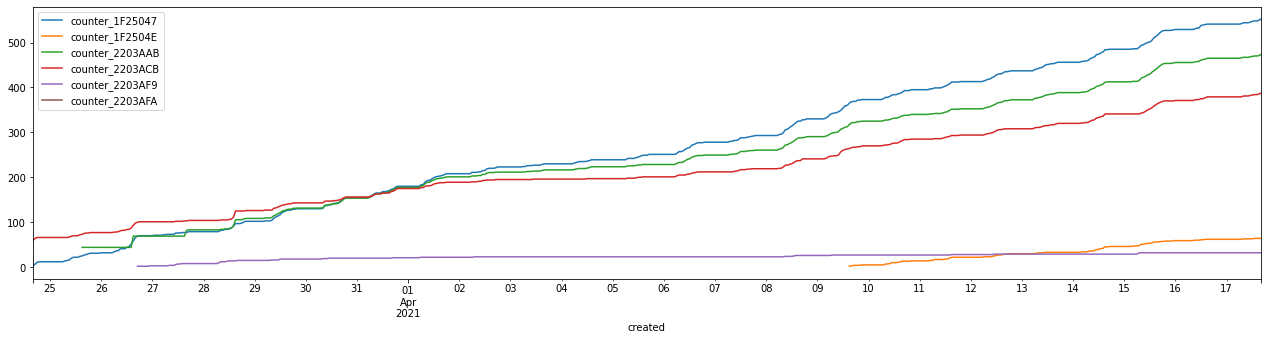

In [200]:
cum_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('counter_')])
cum_columns.append('created')

message_data_wide[cum_columns].plot(x='created', figsize=(22, 5))

## Visualize differential data

(0.0, 10.0)

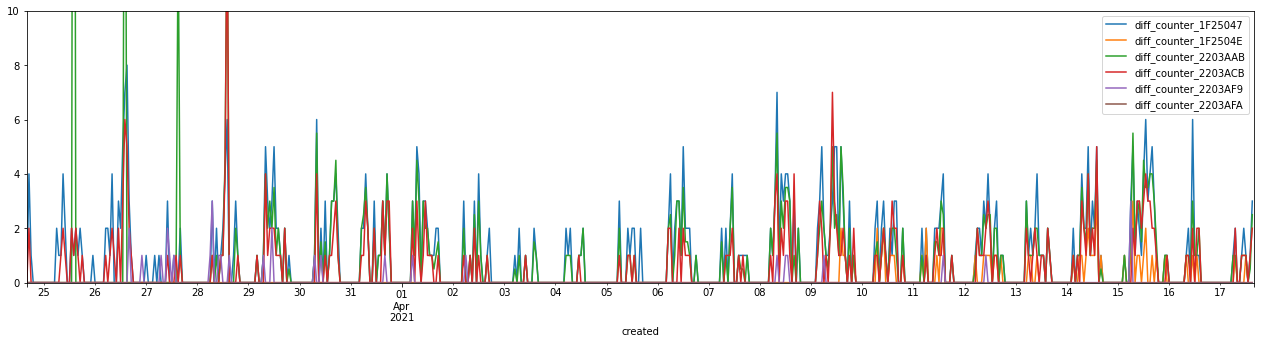

In [201]:
diff_columns = list(message_data_wide.columns[message_data_wide.columns.str.startswith('diff_')])
diff_columns.append('created')

ax = message_data_wide[diff_columns].plot(kind = 'line', x='created', figsize=(22, 5))
ax.set_ylim([0, 10])

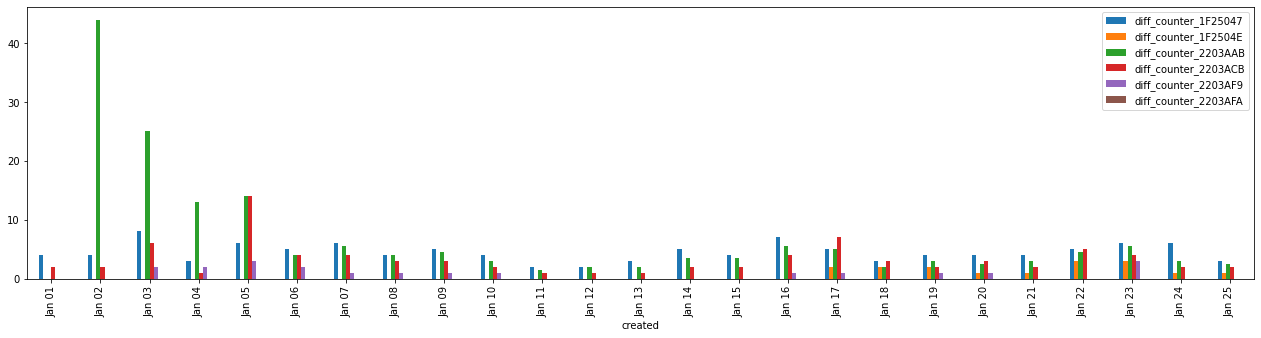

In [202]:
diff_columns = list(message_data_days.columns[message_data_wide.columns.str.startswith('diff_')])
diff_columns.append('created')

ax = message_data_days[diff_columns].plot(kind = 'bar', x='created', figsize=(22, 5))

ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))


---
## Spielwiese

<AxesSubplot:xlabel='created'>

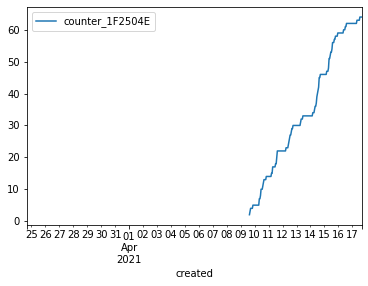

In [203]:
message_data_wide[['created', 'counter_1F2504E']].plot(x='created')

## google drive api (testing still)

In [183]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [184]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=491460359726-lj3ilu22ir8ckqnjefot5gs99vmig1d2.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [185]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')
    print(file1)

unsupported file
GoogleDriveFile({'kind': 'drive#file', 'id': '1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'etag': '"MTYxNjc3NDQ0MTgxNA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA', 'alternateLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/edit?usp=drivesdk', 'embedLink': 'https://docs.google.com/document/d/1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA/preview?ouid=115354251365952521942', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.document', 'thumbnailLink': 'https://docs.google.com/feeds/vt?gd=true&id=1d0ORJisSlsO68xoX9jHrC8vsGZgaNfn1d45gVDojFCA&v=1&s=AMedNnoAAAAAYHsoKrOU3hMw4mr3_jfxeTHr_y2-Tm2C&sz=s220', 'title': 'Unbenanntes Dokument', 'mimeType': 'application/vnd.google-apps.document', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'creat

In [186]:
print(fileCons)

[b'{\n "error": {\n  "errors": [\n   {\n    "domain": "usageLimits",\n    "reason": "dailyLimitExceededUnreg",\n    "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup.",\n    "extendedHelp": "https://code.google.com/apis/console"\n   }\n  ],\n  "code": 403,\n  "message": "Daily Limit for Unauthenticated Use Exceeded. Continued use requires signup."\n }\n}\n']
